# Demo_ORB

In [1]:
import os

cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
img_file_dota = os.path.join(input_folder, 'dota_map.jpg')
img_file = os.path.join(input_folder, 'qq_screen_capture.png')
img_file1 = os.path.join(input_folder, 'qq_screen_capture1.png')

print('input_folder:  \t', input_folder)
print('img_file_dota: \t', img_file_dota)
print('img_file:      \t', img_file)
print('img_file1:     \t', img_file1)

input_folder:  	 D:\bitbucket\kaggle\landmark-recognition-challenge\input
img_file_dota: 	 D:\bitbucket\kaggle\landmark-recognition-challenge\input\dota_map.jpg
img_file:      	 D:\bitbucket\kaggle\landmark-recognition-challenge\input\qq_screen_capture.png
img_file1:     	 D:\bitbucket\kaggle\landmark-recognition-challenge\input\qq_screen_capture1.png


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, transform

img_obj1 = Image.open(img_file)
img_obj2 = io.imread(img_file)

print(type(img_obj1))
print(type(img_obj2))

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


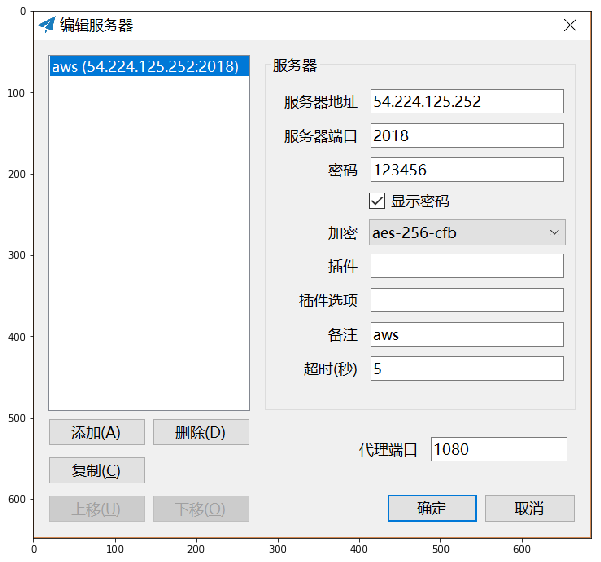

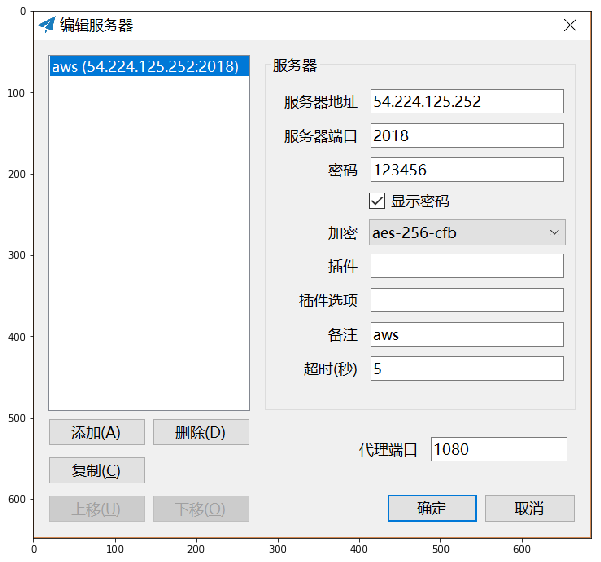

C:\Users\study\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


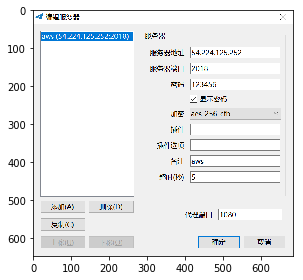

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(img_obj1)
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(img_obj2)
plt.show()

io.imshow(img_obj2)

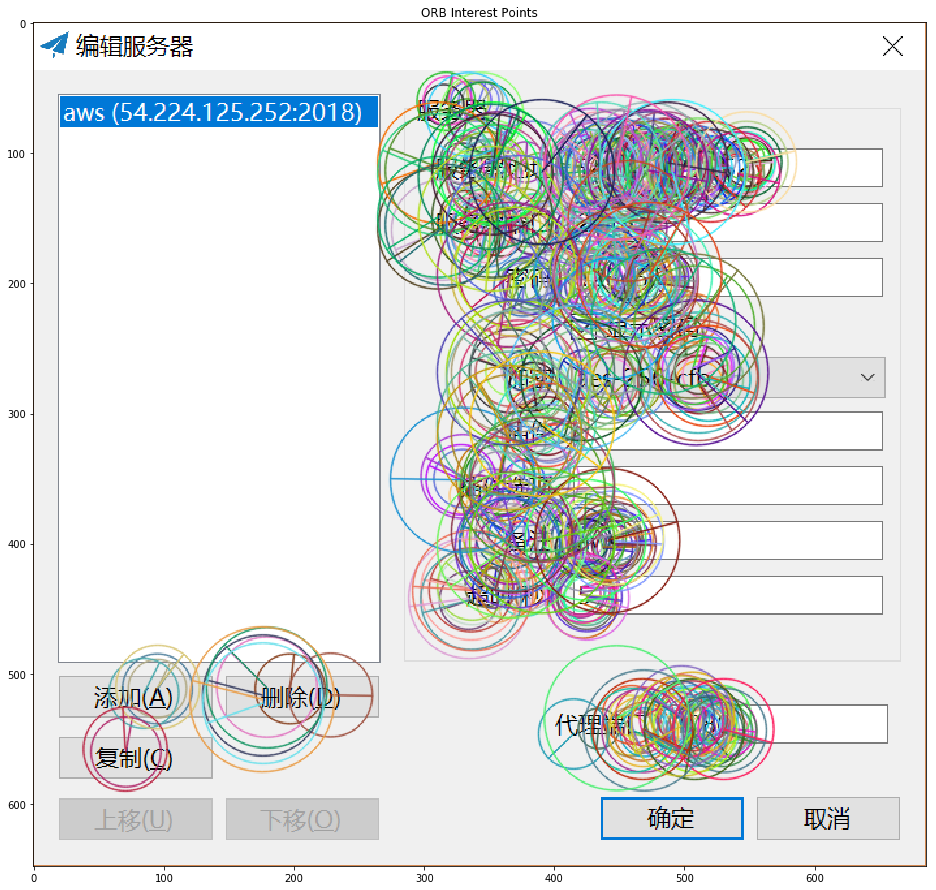

In [4]:
import cv2

# dataset_path = '../input/google-image-recognition-tutorial'
img_building = cv2.imread(img_file)
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv2's BRG default color order to RGB

clf = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.

key_points, description = clf.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

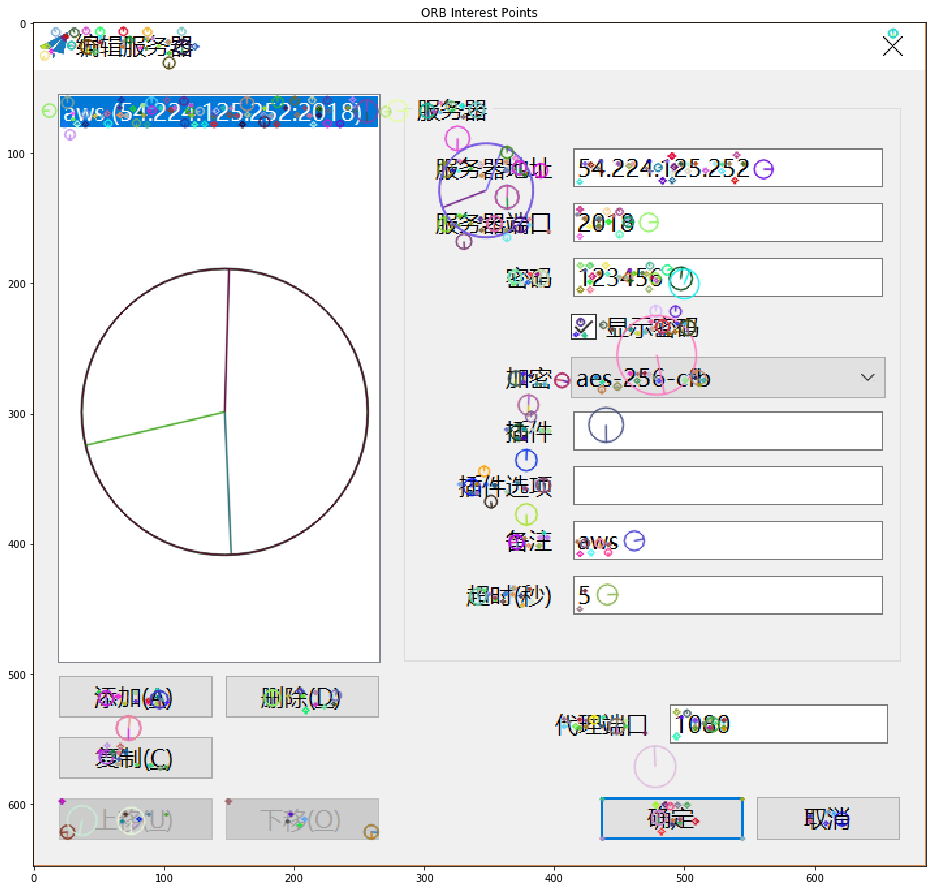

In [5]:
import cv2

# dataset_path = '../input/google-image-recognition-tutorial'
img_building = cv2.imread(img_file)
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv2's BRG default color order to RGB

# clf = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
clf = cv2.xfeatures2d.SIFT_create()

key_points, description = clf.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

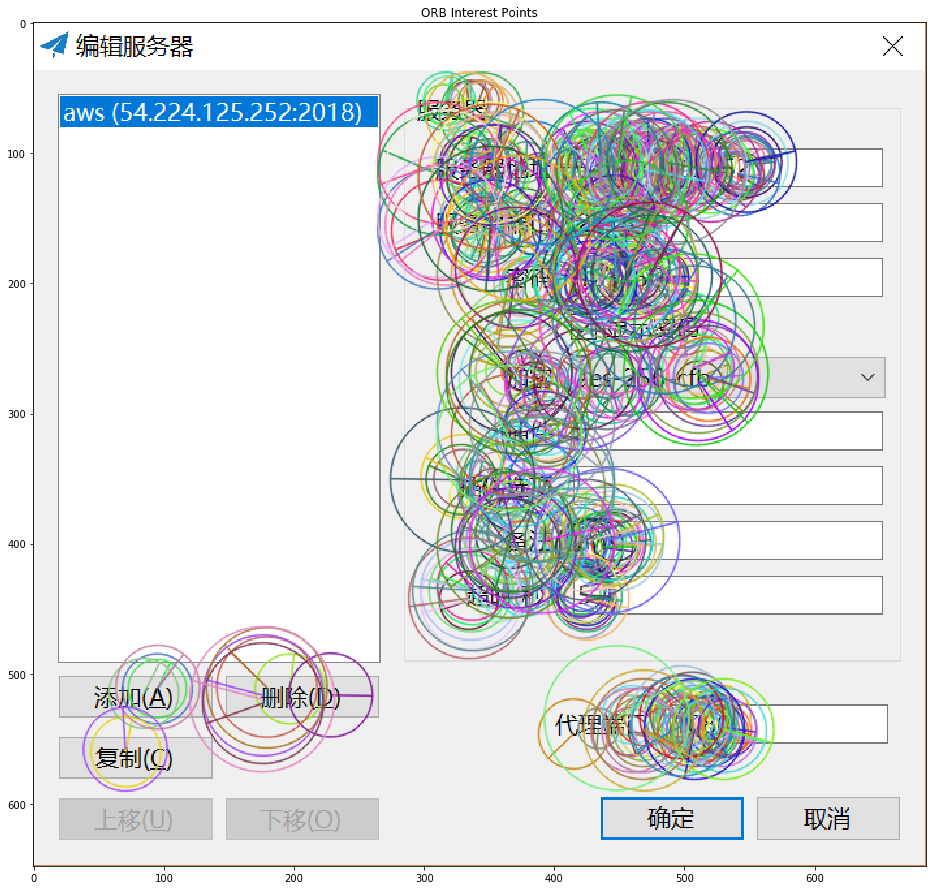

In [6]:
import cv2

# dataset_path = '../input/google-image-recognition-tutorial'
img_building = cv2.imread(img_file)
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv2's BRG default color order to RGB

clf = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.

key_points, description = clf.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [7]:
print(len(key_points))
print(key_points[0])

print(len(description))
print(description[0])

501
<KeyPoint 00000285621D5E70>
501
[176 187 208 205  38 145  86 112  95 132  28  38 162 192 230 100  90 122
 142  66 222 168 103 187 130 148 129  59  62 171  92   5]


['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']
26.0


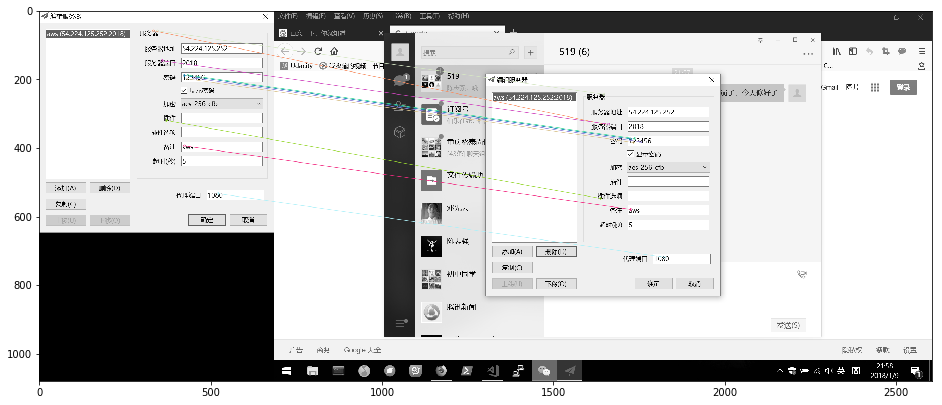

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']
0.0


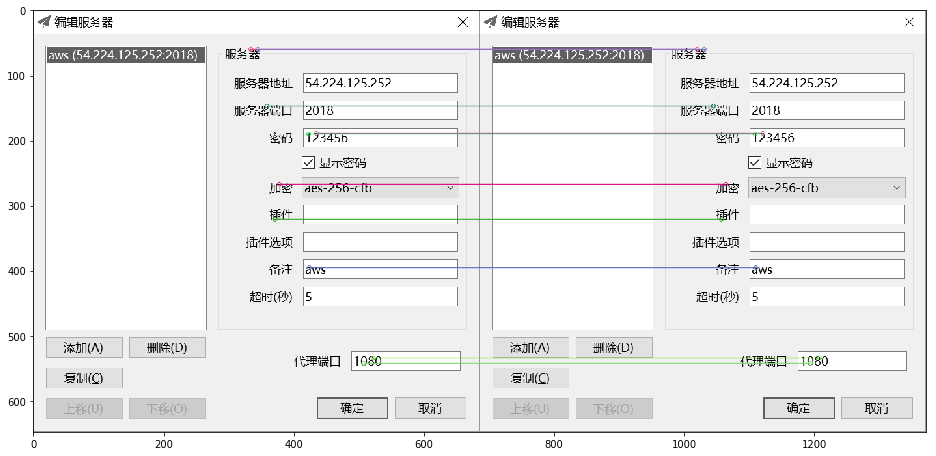

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']
0.0


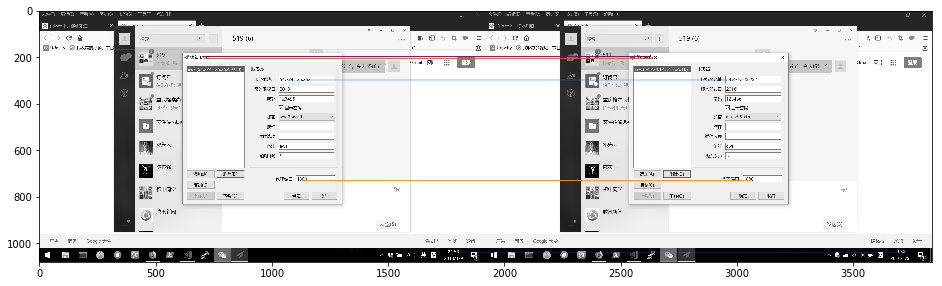

In [21]:
def image_detect_and_compute(image_file):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = clf.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(image_file1, image_file2, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(image_file1)
    img2, kp2, des2 = image_detect_and_compute(image_file2)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
#     print(len(matches))
    print(dir(matches[0]))
    print(matches[100].distance)
    
    plt.imshow(img_matches); plt.show()


draw_image_matches(img_file, img_file1)
draw_image_matches(img_file, img_file)
draw_image_matches(img_file1, img_file1)

In [ ]:
# import numpy as np

# filename = img_file
# img = cv2.imread(filename)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# gray = np.float32(gray)
# dst = cv2.cornerHarris(gray,2,3,0.04)

# #result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)

# # Threshold for an optimal value, it may vary depending on the image.
# img[dst>0.01*dst.max()]=[0,0,255]

# cv2.imshow('dst',img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

In [ ]:
class OrbMatch(object):
    def __init__(
        image_file, 
        original_folder, 
        n_features=500, 
        is_crossCheck = True, 
        n_matches=100, 
        min_distance=60, 
        min_good_match=50,
        n_class = 14951,
        top=3,
    ):
        self._image_file = image_file
        self._original_folder = original_folder
        
        self._n_features = n_features
        self._is_crossCheck = is_crossCheck
        self._n_matches = n_matches
        self._min_distance = min_distance
        self._min_good_match = min_good_match
        self._n_class = n_class
        self._top = top
        
        self._key_point = None
        self._destance = None
        
        self._clf = cv2.ORB_create(self._n_features)
        self._bf  = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=self._is_crossCheck)
#         self._class_weight = class_weight
    
    def get_class_weight():
        pass
        
    def image_detect_and_compute(image_file):
        """Detect and compute interest points and their descriptors."""
        img = cv2.imread(image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kp, des = self._clf.detectAndCompute(img, None)
        return des
        
    def match():
        img = cv2.imread(image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        des1 = self.image_detect_and_compute(self._image_file)
        matched_image_classes = np.zeros(self._n_class)
        
        for file_name in os.listdir(self._original_folder):
            image_file = os.path.join(self._original_folder, file_name)
            print(image_file)
            des2 = self.image_detect_and_compute(image_file)

            matches = self._bf.match(des1, des2)
#             matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
            matches = list(filter(lambda x: x.distance < self._min_distance, matches))
            print(len(matches))
            if len(matches) < self._min_good_match:
                class_indx = get_class_indx(file_name)
                matched_image_classes[class_indx] = matched_image_classes[class_indx] + 1
        matched_image_classes = matched_image_classes / sum(matched_image_classes)
        best_matches = np.argsort(matched_image_classes)[:self._top]
        return best_matches